In [ ]:
'''The project involves the analysis and modeling of a dataset loaded from a CSV file ('data.csv') 
using Python and various data science libraries. Here's an overview of the project:

Data Loading and Initial Exploration:

The dataset is loaded into a Pandas DataFrame (df).
Initial exploration of the dataset is done by displaying the first few rows (df.head()) and checking for any missing values.
Data Visualization:

Seaborn is used for data visualization to understand relationships between different columns in the dataset.
Joint plots, hexbin joint plots, and linear regression plots are employed to visualize patterns and correlations in the data.
Data Preprocessing:

Null values in the dataset are dropped to ensure data cleanliness.
Data Splitting:

The dataset is split into training and testing sets using the train_test_split function, a common step in machine learning.
Linear Regression Modeling:

A linear regression model is created and trained using the training data.
Coefficients of the model are displayed, and predictions are made on the test set.
Performance of the model is evaluated using metrics such as Mean Absolute Error (MAE),
Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared.
Lasso Regression Modeling:

A Lasso Regression model is implemented, and predictions are made on the test set.
The R-squared score is calculated to assess the model's performance.
Ridge Regression Modeling:

A Ridge Regression model is implemented, and predictions are made on the test set.
The R-squared score is calculated to evaluate the model's performance.
In summary, the project involves data analysis, visualization, and the application of linear regression,
Lasso regression, and Ridge regression models to predict a target variable ('TAX') based on various features.
The performance of the models is assessed using standard regression evaluation metrics.'''

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
'''Import necessary libraries: NumPy, Pandas, Matplotlib, and Seaborn.'''

In [3]:
df=pd.read_csv('data.csv')

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
'''Check and display the count of null values in each column of the DataFrame.'''

In [6]:
df=df.dropna(axis=1)

In [ ]:
'''Drop columns with null values from the DataFrame df.'''

In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
'''Verify that there are no more null values in the DataFrame.'''

## DATA ANALYSIS

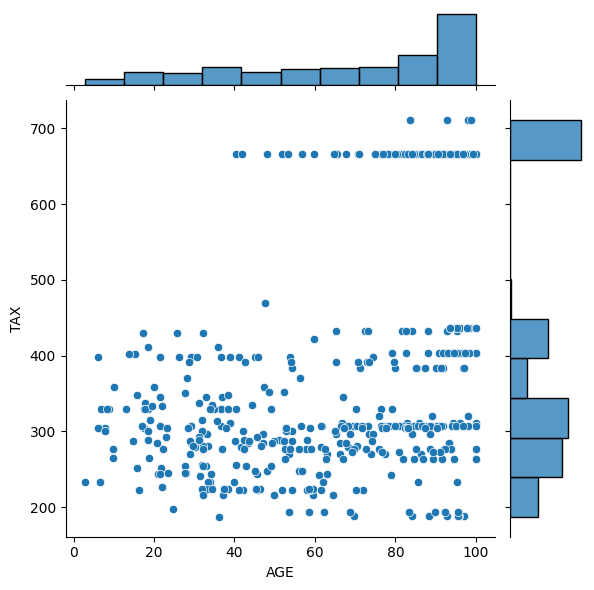

In [8]:
sns.jointplot(x="AGE",y="TAX",data=df)

In [ ]:
'''Create a joint plot to visualize the relationship between 'AGE' and 'TAX' columns.'''

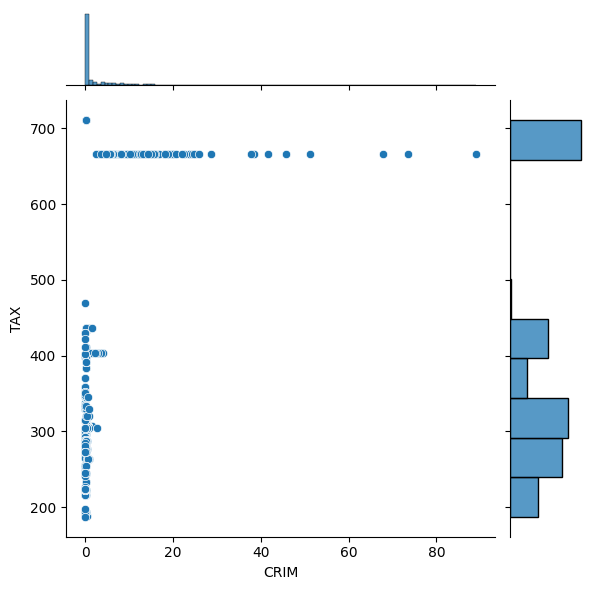

In [9]:
sns.jointplot(x="CRIM",y="TAX",data=df)

In [ ]:
'''Create a joint plot to visualize the relationship between 'CRIM' and 'TAX' columns.'''

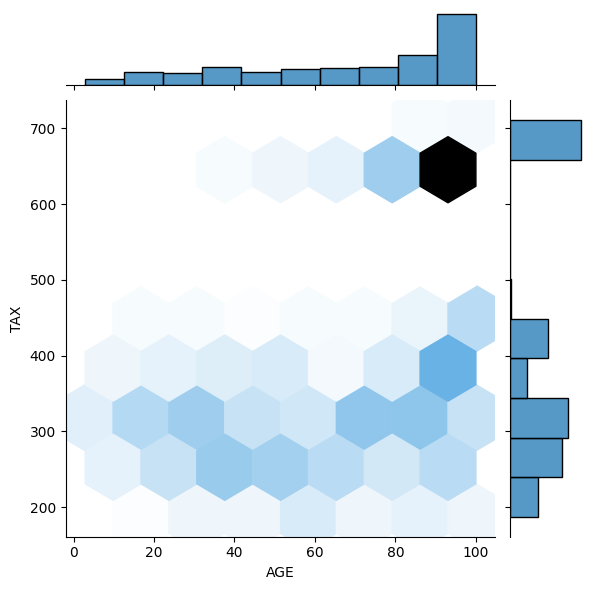

In [10]:
sns.jointplot(x="AGE",y="TAX",data=df,kind='hex')

In [ ]:
'''Create a hexbin joint plot to visualize the density of points between 'AGE' and 'TAX'.'''

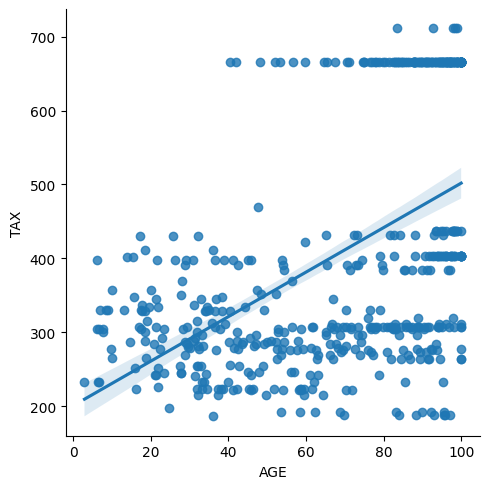

In [11]:
sns.lmplot(x="AGE",y="TAX",data=df)

In [ ]:
'''Create a linear regression plot to model the relationship between 'AGE' and 'TAX'.'''

## TRAINING THE DATA

In [12]:
y=df["TAX"]

In [13]:
X=df[['CRIM','ZN','INDUS','CHAS','NOX', 'AGE', 'DIS','RAD','PTRATIO','B','LSTAT','MEDV']]

In [ ]:
'''Separate the target variable ('TAX') and feature variables from the DataFrame.'''

In [14]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [15]:
import sys

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
'''Split the data into training and testing sets using 70% for training and 30% for testing.'''

In [16]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,PTRATIO,B,LSTAT,MEDV
312,0.26169,0.0,9.90,0,0.544,90.4,2.8340,4,18.4,396.30,11.72,19.4
453,8.24809,0.0,18.10,0,0.713,99.3,2.4527,24,20.2,375.87,16.74,17.8
360,4.54192,0.0,18.10,0,0.770,88.0,2.5182,24,20.2,374.56,7.79,25.0
401,14.23620,0.0,18.10,0,0.693,100.0,1.5741,24,20.2,396.90,20.32,7.2
86,0.05188,0.0,4.49,0,0.449,45.1,4.4272,3,18.5,395.99,12.86,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...
63,0.12650,25.0,5.13,0,0.453,43.4,7.9809,8,19.7,395.58,9.50,25.0
326,0.30347,0.0,7.38,0,0.493,28.9,5.4159,5,19.6,396.90,6.15,23.0
337,0.03041,0.0,5.19,0,0.515,59.6,5.6150,5,20.2,394.81,10.56,18.5
11,0.11747,12.5,7.87,0,0.524,82.9,6.2267,5,15.2,396.90,13.27,18.9


In [ ]:
'''Display the training data features.'''

In [18]:
y_train

312    304
453    666
360    666
401    666
86     247
      ... 
63     284
326    287
337    224
11     311
351    411
Name: TAX, Length: 357, dtype: int64

In [ ]:
'''Display the training data target variable.'''

In [19]:
from sklearn.linear_model import *

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
'''Import the Linear Regression model and fit it to the training data.

Linear Regression Model:
Linear regression is a statistical method for modeling the relationship between a dependent variable and one or more independent variables.
It assumes a linear relationship and is represented by a simple equation, making it easy to interpret.

Why Use Linear Regression:

Simplicity: Easy to understand and implement.
Interpretability: Coefficients have clear interpretations.
Prediction: Effective for predicting outcomes, especially when relationships are approximately linear.
Baseline Model: Serves as a benchmark for comparing with more complex models.
Assumptions Testing: Allows testing of key assumptions for model reliability.
Feature Importance: Highlights the importance of each feature in predicting the target variable.
Linear regression is a versatile and interpretable tool, making it a common choice for various applications.'''

In [20]:
print (f'coefficients {lm.coef_}')

coefficients [-2.75129241e-01  7.65919791e-01  6.77960869e+00 -1.88212255e+01
  7.44179004e+01 -3.99472833e-02  6.71680448e-01  1.40835348e+01
  6.67598509e-01 -2.61497814e-03  4.19227450e-02 -1.29503035e+00]


In [ ]:
'''Display the coefficients of the linear regression model.'''

## TESTING THE DATA

In [22]:
predictions = lm.predict(X_test)
predictions

array([316.32212019, 297.26623959, 329.31413506, 320.8177192 ,
       292.47087711, 265.73005012, 226.05490865, 325.02377334,
       308.28251088, 322.70411948, 327.18323026, 246.24040337,
       357.89889234, 335.1135039 , 407.33836249, 294.03539807,
       308.4861301 , 656.95090632, 665.45617862, 274.76708362,
       407.07156675, 261.97422638, 290.20138338, 283.44578293,
       346.79543471, 308.81172222, 327.08521875, 677.80867265,
       653.02254712, 324.36656627, 671.1332164 , 229.61731559,
       306.8064874 , 312.90626516, 294.433483  , 390.68465135,
       300.28253881, 286.12801204, 600.06292937, 309.29565465,
       670.82415769, 656.9870631 , 225.94134888, 335.94115055,
       343.74712913, 413.36764165, 313.06104059, 237.04253566,
       677.07945872, 315.00366279, 600.50956249, 204.40629926,
       266.86209371, 674.61588764, 313.54679623, 223.72590103,
       316.19523663, 659.9314999 , 264.29916094, 315.13429033,
       306.76169654, 274.84143242, 339.71647532, 300.17

In [ ]:
'''Make predictions using the linear regression model on the test data.'''

Text(0, 0.5, 'Predicted Y')

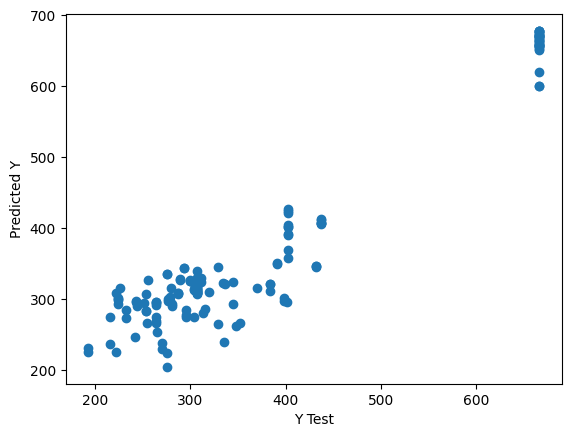

In [23]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
'''Create a scatter plot to compare the actual 'TAX' values in the test set with the predicted values.'''

In [24]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 29.217074051469123
MSE: 1544.420897770034
RMSE: 39.29912082693497


In [ ]:
'''Calculate and display evaluation metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).'''

In [25]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

0.9350597865311151

In [ ]:
'''Calculate and display the R-squared score for the linear regression model.'''

## Lasso Regression

In [ ]:
'''Lasso Regression is a linear regression technique that introduces a regularization term,
specifically L1 regularization, into the standard linear regression model. The regularization term penalizes
the absolute values of the coefficients of the features, encouraging the model to select a sparse set of features by pushing some of
the coefficients to exactly zero.

In Lasso Regression, the objective function to be minimized is the sum of two terms:

The residual sum of squares (RSS), which measures the difference between the predicted and actual values.
The L1 regularization term, which is the absolute sum of the coefficients multiplied by a regularization parameter (alpha).
The use of Lasso Regression in this dataset is motivated by the desire to perform feature selection.
Lasso tends to shrink some coefficients to exactly zero, effectively excluding those features from the model.
This can be beneficial when dealing with datasets that have many features, as it simplifies the model and potentially improves its interpretability.
The choice to use Lasso depends on the specific goals of the analysis and the characteristics of the dataset.
'''

In [26]:
las=Lasso()
las.fit(X_train,y_train)

Lasso()

In [ ]:
'''Create and fit a Lasso Regression model to the training data.'''

In [27]:
pred=las.predict(X_test)
r2_score(y_test,pred)

0.932548512641649

In [ ]:
'''Make predictions using the Lasso Regression model on the test data and calculate the R-squared score.'''

## Ridge Regression

In [ ]:
'''Ridge Regression is another form of linear regression that incorporates a regularization term,
specifically L2 regularization. Similar to Lasso Regression, Ridge Regression aims to prevent overfitting by penalizing the size of the coefficients,
but instead of using the absolute values of the coefficients, it uses the squared values.
In contrast to Lasso Regression, Ridge Regression does not force coefficients to be exactly zero. Instead, it shrinks the coefficients towards zero,
but they can still take non-zero values.

The use of Ridge Regression is often beneficial when dealing with multicollinearity, a situation where features in the dataset are highly correlated.
Ridge Regression helps to stabilize the coefficients and avoid extreme values.

In summary, Ridge Regression is employed to mitigate overfitting and stabilize coefficients,
especially in situations where multicollinearity is present in the dataset.
The choice between Ridge and Lasso regression depends on the specific characteristics and goals of the analysis.'''

In [28]:
rid=Ridge()
rid.fit(X_train,y_train)


Ridge()

In [ ]:
'''Create and fit a Ridge Regression model to the training data.'''

In [29]:
pred=rid.predict(X_test)
r2_score(y_test,pred)

0.9353244743601373

In [ ]:
'''
And lastly
Make predictions using the Ridge Regression model on the test data and calculate the R-squared score.
The R-squared score, also known as the coefficient of determination,
is a statistical measure that represents the proportion of the variation in the dependent variable that is
predictable from the independent variable(s). It is denoted as R² or r² and pronounced as "R squared"1.

In the context of statistical models, R² is used for the prediction of future outcomes or the testing of hypotheses,
based on other related information. It provides a measure of how well observed outcomes are replicated by the model,
based on the proportion of total variation of outcomes explained by the model1.

pred = rid.predict(X_test): This line is using your Ridge regression model to predict the outcomes for your test data. The predictions are being stored in the variable pred.

r2_score(y_test, pred): This line is calculating the R-squared score,
which is a statistical measure that represents how close the data are to the fitted regression line.
The closer the R-squared value is to 1, the better the fit.
'''

In [ ]:
'''
Project Conclusion - Real Estate Analysis

In this real estate analysis project, we embarked on a comprehensive exploration of a
dataset containing various features related to real estate properties.
The project unfolded in several key phases, each contributing to a holistic understanding of the data.

Data Exploration and Visualization:

We began by loading and exploring the dataset, gaining insights into the structure and contents of the data.
Seaborn visualizations were employed to uncover relationships between different variables, providing a visual context for subsequent analyses.
Data Preprocessing:

We addressed missing values in the dataset to ensure the cleanliness of our data.
Feature selection and dropping were performed to streamline the dataset for modeling.
Linear Regression Modeling:

A linear regression model was trained on the data to predict the target variable ('TAX') based on selected features.
Evaluation metrics such as MAE, MSE, RMSE, and R-squared were employed to assess the performance of the linear regression model.
Regularization Techniques:

Lasso and Ridge regression models were introduced as part of the analysis.
Lasso Regression, with its ability for feature selection, was employed to potentially identify significant predictors.
Ridge Regression, addressing multicollinearity, aimed to stabilize coefficients for robust predictions.
Key Takeaways:
The linear regression model provided valuable insights into the relationship between features and the target variable,
allowing for predictive modeling.
Lasso and Ridge regression techniques were applied to address specific challenges in the dataset,
offering alternative perspectives on feature importance and model stability.
Future Directions:
Further exploration could involve hyperparameter tuning for Lasso and Ridge regression to optimize model performance.
Feature engineering and additional data sources could enhance the predictive capabilities of the models.
The project sets the stage for more in-depth analyses and considerations, contributing to a more nuanced understanding of real estate dynamics.
Acknowledgments:
We extend our appreciation to the dataset providers and the open-source data science community for fostering collaborative exploration and learning.

This project lays the foundation for continued exploration and refinement,
inviting future investigations into the complex world of real estate analytics.
'''